In [121]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import random
import time

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, PredefinedSplit

# Linear Regression and Lasso
from sklearn import linear_model

# Ridge
from sklearn.linear_model import Ridge

# ElasticNet
from sklearn.linear_model import ElasticNet

# SVR
from sklearn.svm import SVR

# MLP Regressor
from sklearn.neural_network import MLPRegressor

In [123]:
df = pd.read_csv('C:\\git\\me\\ssl-detector\\data\\object_localization\\training\\log.csv')
df["BALL X ROB"] = ((df["BALL X"] - df["ROBOT X"]) * np.cos(df["ROBOT THETA"])) + ((df["BALL Y"] - df["ROBOT Y"]) * np.sin(df["ROBOT THETA"]))
df["BALL Y ROB"] = (-1 * (df["BALL X"] - df["ROBOT X"]) * np.sin(df["ROBOT THETA"])) + ((df["BALL Y"] - df["ROBOT Y"]) * np.cos(df["ROBOT THETA"]))
df["BALL ROB R POLAR"] = ((df["BALL X ROB"]  ** 2) + (df["BALL Y ROB"]  ** 2)) ** .5
df["BALL ROB TETHA POLAR"] = np.arctan(df["BALL Y ROB"] / df["BALL X ROB"])
df["CENTER_X"] = (df["X_MAX"] + df["X_MIN"]) / 2
df["CENTER_Y"] = (df["Y_MAX"] + df["Y_MIN"]) / 2
df["WIDTH"] = (df["X_MAX"] - df["X_MIN"])
df["HEIGHT"] = (df["Y_MAX"] - df["Y_MIN"])
df

,FRAME_NR,ROBOT_ID,ROBOT X,ROBOT Y,ROBOT THETA,BALL X,BALL Y,X_MIN,X_MAX,Y_MIN,Y_MAX,VALID,BALL X ROB,BALL Y ROB,BALL ROB R POLAR,BALL ROB TETHA POLAR,CENTER_X,CENTER_Y,WIDTH,HEIGHT
0,1,0,348.142365,-1587.262207,-0.028249,777.531250,-1577.272583,240,346,300,415,1,428.935407,22.113897,429.505073,0.051510,293.0,357.5,106,115
1,2,0,348.574463,-1587.190552,-0.025113,1022.099731,-1381.877319,30,104,200,262,1,668.157384,222.161025,704.123434,0.320999,67.0,231.0,74,62
2,3,0,348.052734,-1586.944214,-0.023494,1016.431030,-1589.104980,282,348,198,265,1,668.244607,13.541072,668.381789,0.020261,315.0,231.5,66,67
3,4,0,348.285736,-1587.138672,-0.030028,1082.683105,-1863.589600,579,636,178,238,1,742.366347,-254.277051,784.706704,-0.329998,607.5,208.0,57,60
4,5,0,348.700897,-1587.978271,-0.030235,1348.265137,-1360.317261,114,162,141,189,1,992.225241,257.773692,1025.162526,0.254175,138.0,165.0,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,0,348.279327,-1587.104614,-0.032225,3486.522705,-1933.834839,374,403,75,93,1,3147.785604,-245.436629,3157.339599,-0.077814,388.5,84.0,29,18
72,73,0,348.166229,-1586.643677,-0.028958,3463.279297,-2154.915039,416,450,73,92,1,3130.260520,-477.839767,3166.522030,-0.151482,433.0,82.5,34,19
73,74,0,348.602753,-1587.295654,-0.030530,3512.626953,-2407.616943,475,499,71,89,1,3187.590047,-723.357348,3268.635213,-0.223150,487.0,80.0,24,18
74,75,0,348.508545,-1587.570923,-0.028803,3492.888184,-2667.592041,529,552,71,92,1,3174.179352,-989.016868,3324.690802,-0.302048,540.5,81.5,23,21


In [124]:
df_test = pd.read_csv('C:\\git\\me\\ssl-detector\\data\\object_localization\\test\\log.csv')
df_test = df_test[df_test["VALID"] == 1]
df_test.reset_index(drop=True, inplace=True)
df_test["BALL X ROB"] = ((df_test["BALL X"] - df_test["ROBOT X"]) * np.cos(df_test["ROBOT THETA"])) + ((df_test["BALL Y"] - df_test["ROBOT Y"]) * np.sin(df_test["ROBOT THETA"]))
df_test["BALL Y ROB"] = (-1 * (df_test["BALL X"] - df_test["ROBOT X"]) * np.sin(df_test["ROBOT THETA"])) + ((df_test["BALL Y"] - df_test["ROBOT Y"]) * np.cos(df_test["ROBOT THETA"]))
df_test["BALL ROB R POLAR"] = ((df_test["BALL X ROB"]  ** 2) + (df_test["BALL Y ROB"]  ** 2)) ** .5
df_test["BALL ROB TETHA POLAR"] = np.arctan(df_test["BALL Y ROB"] / df_test["BALL X ROB"])
df_test["CENTER_X"] = (df_test["X_MAX"] + df_test["X_MIN"]) / 2
df_test["CENTER_Y"] = (df_test["Y_MAX"] + df_test["Y_MIN"]) / 2
df_test["WIDTH"] = (df_test["X_MAX"] - df_test["X_MIN"])
df_test["HEIGHT"] = (df_test["Y_MAX"] - df_test["Y_MIN"])
df_test

,FRAME_NR,ROBOT_ID,ROBOT X,ROBOT Y,ROBOT THETA,BALL X,BALL Y,X_MIN,X_MAX,Y_MIN,Y_MAX,VALID,BALL X ROB,BALL Y ROB,BALL ROB R POLAR,BALL ROB TETHA POLAR,CENTER_X,CENTER_Y,WIDTH,HEIGHT
0,1,0,33.422211,-1579.727783,-0.070155,529.976318,-1600.046021,286,374,263,356,1,496.756916,14.538888,496.969629,0.029259,330.0,309.5,88,93
1,2,0,33.812599,-1579.909058,-0.065734,791.594055,-1619.363159,302,367,179,240,1,758.736487,10.406915,758.807855,0.013715,334.5,209.5,65,61
2,3,0,33.291943,-1579.514648,-0.067549,768.081970,-1884.383789,583,639,179,237,1,753.692160,-254.577504,795.525975,-0.325742,611.0,208.0,56,58
3,4,0,33.642254,-1579.563354,-0.067678,806.625977,-1413.603516,67,131,181,242,1,759.990838,217.854149,790.598826,0.279168,99.0,211.5,64,61
4,5,0,33.488876,-1579.915283,-0.069774,1054.532837,-1633.124512,312,356,140,187,1,1022.269144,18.104947,1022.429455,0.017709,334.0,163.5,44,47
5,6,0,33.754795,-1579.721069,-0.069069,1015.080811,-1898.861328,520,564,140,187,1,1001.011293,-250.654433,1031.916302,-0.245356,542.0,163.5,44,47
6,7,0,33.232338,-1581.321411,-0.067254,1043.108765,-1401.398438,133,181,142,191,1,995.501888,247.383640,1025.779057,0.243568,157.0,166.5,48,49
7,8,0,33.183331,-1580.515259,-0.069830,1285.760254,-1638.393311,310,348,123,157,1,1253.562584,29.659178,1253.913401,0.023655,329.0,140.0,38,34
8,10,0,32.501263,-1579.302612,-0.068676,1267.537354,-1914.623901,482,517,120,159,1,1255.135105,-249.780666,1279.747832,-0.196441,499.5,139.5,35,39
9,11,0,33.318893,-1579.559937,-0.068133,1260.767578,-2133.533936,606,638,116,156,1,1262.315597,-469.123436,1346.669026,-0.355819,622.0,136.0,32,40


In [125]:
input_data = df.loc[:,["X_MIN", "X_MAX", "Y_MIN", "Y_MAX"]].copy()
# input_data = df.loc[:,["CENTER_X", "CENTER_Y", "WIDTH", "HEIGHT"]].copy()

output_data = df.loc[:,["BALL X ROB", "BALL Y ROB"]].copy()
# output_data = df.loc[:,["BALL ROB R POLAR", "BALL ROB TETHA POLAR"]].copy()

test_input_data = df_test.loc[:,["X_MIN", "X_MAX", "Y_MIN", "Y_MAX"]].copy()
test_output_data = df_test.loc[:,["BALL X ROB", "BALL Y ROB"]].copy()

# input_data_aug = input_data.copy()
# output_data_aug = output_data.copy()

# data_size = input_data.shape[0]
# count = 0
# for idx in range(data_size):
#     for inc in range(1, 15):
#         next_point = idx + inc
#         # next_point = random.randint(1, (data_size - 1))
#         if next_point >= data_size:
#             continue
        
#         new_input = (input_data.loc[idx, :].copy() + input_data.loc[next_point, :].copy()) / 2
#         temp_df = pd.DataFrame([new_input], columns=input_data.columns, index=[data_size + count])
#         input_data_aug = pd.concat([input_data_aug, temp_df])
        
#         new_output = (output_data.loc[idx, :].copy() + output_data.loc[next_point, :].copy()) / 2
#         temp_df = pd.DataFrame([new_output], columns=output_data.columns, index=[data_size + count])
#         output_data_aug = pd.concat([output_data_aug, temp_df])

#         count += 1

# X_train, X_temp_test, y_train, y_temp_test = train_test_split(input_data_aug, output_data_aug, test_size=0.3, random_state=1)
# X_test, X_valid, y_test, y_valid = train_test_split(X_temp_test, y_temp_test, test_size=0.5, random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(input_data_aug, output_data_aug, test_size=0.1, random_state=1)
# X_valid, y_valid = (X_test,y_train)

X_train, y_train = (input_data, output_data)
X_test, y_test = (test_input_data, test_output_data)
X_valid, y_valid = (X_test, y_train)

input_min_max_scaler = MinMaxScaler()
X_train_preprocessed = input_min_max_scaler.fit_transform(X_train)
X_valid_preprocessed = input_min_max_scaler.transform(X_valid)
X_test_preprocessed = input_min_max_scaler.transform(X_test)

output_min_max_scaler = MinMaxScaler()
y_train_preprocessed = output_min_max_scaler.fit_transform(y_train)
y_valid_preprocessed = output_min_max_scaler.transform(y_valid)
y_test_preprocessed = output_min_max_scaler.transform(y_test)

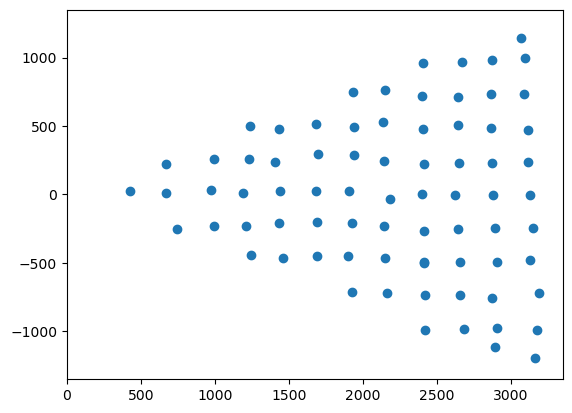

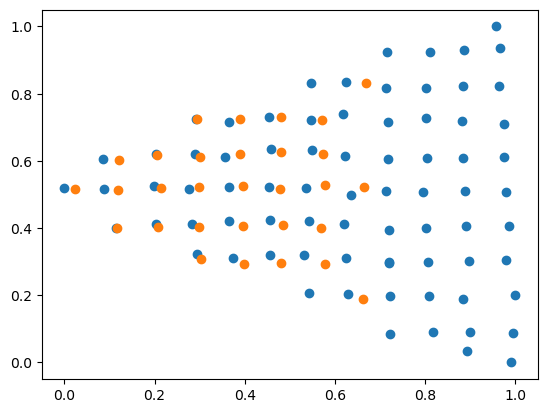

In [126]:
plt.scatter(y_train["BALL X ROB"], y_train["BALL Y ROB"])
# plt.scatter(y_test["BALL X ROB"], y_test["BALL Y ROB"])
ax = plt.gca()
ax.set_xlim([0, 3350])
ax.set_ylim([-1350, 1350])
# plt.title("Train and Test sets")
plt.show()

# plt.scatter(y_train["BALL ROB R POLAR"], y_train["BALL ROB TETHA POLAR"])
# plt.scatter(y_valid["BALL ROB R POLAR"], y_valid["BALL ROB TETHA POLAR"])
# # plt.scatter(y_test["BALL ROB R POLAR"], y_test["BALL ROB TETHA POLAR"])
# plt.show()

plt.scatter(y_train_preprocessed[:, 0], y_train_preprocessed[:, 1])
# plt.scatter(y_valid_preprocessed[:, 0], y_valid_preprocessed[:, 1])
plt.scatter(y_test_preprocessed[:, 0], y_test_preprocessed[:, 1])
plt.show()

In [127]:
def atomic_benchmark_estimator(estimator, X_test, verbose=False, raw=True):
    """Measure runtime prediction of each instance."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_instances, dtype=float)
    for i in range(n_instances):
        if raw:
            instance = X_test.iloc[[i]]
        else:
            instance = X_test[[i], :]
        start = time.time()
        estimator.predict(instance)
        runtimes[i] = time.time() - start
    if verbose:
        print(
            "atomic_benchmark runtimes:",
            min(runtimes),
            np.percentile(runtimes, 50),
            max(runtimes),
        )
    return runtimes


def bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats, verbose):
    """Measure runtime prediction of the whole input."""
    n_instances = X_test.shape[0]
    runtimes = np.zeros(n_bulk_repeats, dtype=float)
    for i in range(n_bulk_repeats):
        start = time.time()
        estimator.predict(X_test)
        runtimes[i] = time.time() - start
    runtimes = np.array(list(map(lambda x: x / float(n_instances), runtimes)))
    if verbose:
        print(
            "bulk_benchmark runtimes:",
            min(runtimes),
            np.percentile(runtimes, 50),
            max(runtimes),
        )
    return runtimes


def benchmark_estimator(estimator, X_test, n_bulk_repeats=30, verbose=True, raw=True):
    """
    Measure runtimes of prediction in both atomic and bulk mode.

    Parameters
    ----------
    estimator : already trained estimator supporting `predict()`
    X_test : test input
    n_bulk_repeats : how many times to repeat when evaluating bulk mode

    Returns
    -------
    atomic_runtimes, bulk_runtimes : a pair of `np.array` which contain the
    runtimes in seconds.

    """
    atomic_runtimes = atomic_benchmark_estimator(estimator, X_test, verbose, raw)
    bulk_runtimes = bulk_benchmark_estimator(estimator, X_test, n_bulk_repeats, verbose)
    return atomic_runtimes, bulk_runtimes


In [128]:
def train_and_test_in(model, xtrain, ytrain, xvalid, yvalid, xtest, ytest, model_name, parameters):
    # Setting GridSearch 
    # parameters = {
    #     'hidden_layer_sizes': [
    #         (10,10,),
    #         (30,30,),
    #         (50,50,),
    #         (100,100,),
    #         (10,10,10,),
    #         (30,30,30,),
    #         (50,50,50,),
    #         (100,100,100,),
    #         (10,10,10,10,10,),
    #         (30,30,30,30,30,),
    #         (50,50,50,50,50,),
    #         (100,100,100,100,100,)
    #     ],
    #     'learning_rate_init': [0.01, 0.001],
    #     'random_state': [3],
    #     'tol': [1e-4, 1e-5, 1e-6, 1e-7],
    #     'max_iter': [50000]
    # }

    # Training
    # X_concat = np.concatenate((xtrain, xvalid))
    # y_concat = np.concatenate((ytrain, yvalid))
    # train_split = np.zeros(len(xtrain)) - 1
    # test_split = np.ones(len(xvalid))
    # ps = PredefinedSplit(np.concatenate((train_split, test_split)))
    # reg_search = GridSearchCV(model, param_grid=parameters, cv=ps,  return_train_score=True, scoring='neg_mean_squared_error')
    # reg_search.fit(X_concat, y_concat)
    reg_search = GridSearchCV(model, param_grid=parameters, cv=5,  return_train_score=True, scoring='neg_mean_squared_error', verbose=3)
    reg_search.fit(xtrain, ytrain)

    # Evaluating
    print(f"Bes tParameters {reg_search.best_params_}")
    y_test_pred = reg_search.predict(xtest)

    processed = "Preprocessed Input" in model_name
    raw = not processed
    print (raw)
    atomic_runtimes, bulk_runtimes = benchmark_estimator(reg_search, xtest, 30, True, raw)
    print(f"Atomic Runtime {atomic_runtimes}")
    print(f"Bulk Runtime {bulk_runtimes}")
    
    if "Preprocessed Input and Output" in model_name:
        y_test_pred = output_min_max_scaler.inverse_transform(y_test_pred)
        ytest = output_min_max_scaler.inverse_transform(ytest)
        scatter_gt = plt.scatter(ytest[:, 0], ytest[:, 1])
    else:
        scatter_gt = plt.scatter(ytest["BALL X ROB"], ytest["BALL Y ROB"])
        # plt.scatter(ytest["BALL ROB R POLAR"], ytest["BALL ROB TETHA POLAR"])

    print (f"RMSE: {mean_squared_error(ytest, y_test_pred, squared=False)}")

    scatter_pred = plt.scatter(y_test_pred[:, 0], y_test_pred[:, 1])
    # plt.text(400, 1100, f"RMSE: {mean_squared_error(ytest, y_test_pred, squared=False)}")
    # plt.title(model_name)
    plt.legend((scatter_gt, scatter_pred),
           ('Ground truth Positions', 'Predicted Positions'),
           loc='upper right',
           fontsize=12)
    ax = plt.gca()
    ax.set_xlim([0, 3350])
    ax.set_ylim([-1350, 1350])
    plt.show()
    
    # plt.scatter(ytest["BALL ROB R POLAR"] * np.cos(ytest["BALL ROB TETHA POLAR"]), ytest["BALL ROB R POLAR"] * np.sin(ytest["BALL ROB TETHA POLAR"]))
    # plt.scatter(y_test_pred[:, 0] * np.cos(y_test_pred[:, 1]), y_test_pred[:, 0] * np.sin(y_test_pred[:, 1]))
    # plt.title(model_name)
    # plt.show()
    
    
def train_and_test(model, model_name, parameters):
    train_and_test_in(model, X_train, y_train, X_valid, y_valid, X_test, y_test, model_name + " - Raw", parameters)

def train_and_test_preprocessed_input(model, model_name, parameters):
    train_and_test_in(model, X_train_preprocessed, y_train, X_valid_preprocessed, y_valid, X_test_preprocessed, y_test, model_name + " - Preprocessed Input", parameters)
    
def train_and_test_preprocessed_all(model, model_name, parameters):
    train_and_test_in(model, X_train_preprocessed, y_train_preprocessed, X_valid_preprocessed, y_valid_preprocessed, X_test_preprocessed, y_test_preprocessed, model_name + " - Preprocessed Input and Output", parameters)

In [129]:
# lin_reg = linear_model.LinearRegression()
# train_and_test(lin_reg, "Linear Regression")

# lin_reg = linear_model.LinearRegression()
# train_and_test_preprocessed_input(lin_reg, "Linear Regression")

# lin_reg = linear_model.LinearRegression()
# train_and_test_preprocessed_all(lin_reg, "Linear Regression")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-764760.045, test=-1770765.262) total time=   0.0s
[CV 2/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-889219.808, test=-650000.818) total time=   0.0s
[CV 3/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-908224.055, test=-484270.461) total time=   0.0s
[CV 4/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-738829.692, test=-1048205.481) total time=   0.0s
[CV 5/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-716845.239, test=-1168298.266) total time=   0.0s
[CV 1/5] END hidden_layer_sizes=(10, 10), learning_rate_init=0

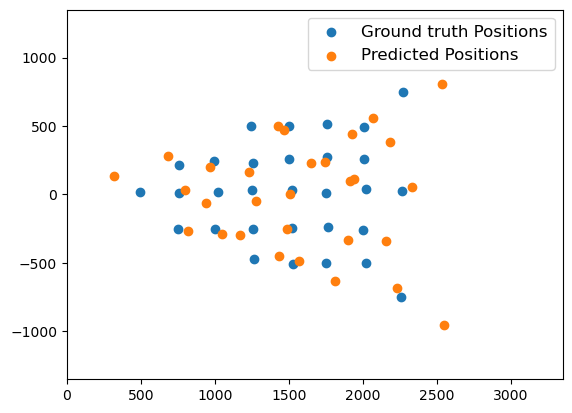

In [130]:
mlp_reg = MLPRegressor()
parameters = {
    'hidden_layer_sizes': [
        (10,10,)
    ],
    'learning_rate_init': [0.01, 0.001],
    'random_state': [3],
    'tol': [1e-4],
    'max_iter': [50000]
}
train_and_test(mlp_reg, "MLP", parameters)

# mlp_reg = MLPRegressor(random_state=1, max_iter=10000, hidden_layer_sizes = (100,100,100,), learning_rate_init=0.01)
# train_and_test(mlp_reg, "MLP")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-1679.442, test=-23046.950) total time=   3.7s
[CV 2/5] END hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-1606.089, test=-1247.643) total time=   3.2s
[CV 3/5] END hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-1420.549, test=-2417.314) total time=   3.3s
[CV 4/5] END hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-793.607, test=-4334.941) total time=   3.2s
[CV 5/5] END hidden_layer_sizes=(50, 50, 50, 50, 50), learning_rate_init=0.001, max_iter=50000, random_state=3, tol=0.0001;, score=(train=-517.778, test=-12609.236) total time=   3.1s
[CV 1/5] END hidden_

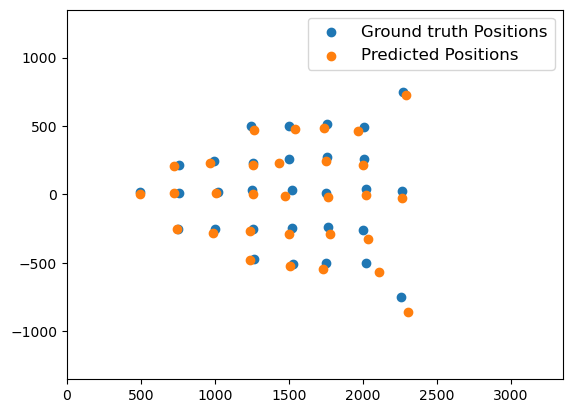

In [131]:
mlp_reg = MLPRegressor()
parameters = {
    'hidden_layer_sizes': [
        (50, 50, 50, 50, 50,)
    ],
    'learning_rate_init': [0.001,0.01],
    'random_state': [3],
    'tol': [1e-4],
    'max_iter': [50000]
}
train_and_test_preprocessed_input(mlp_reg, "MLP", parameters)

# mlp_reg = MLPRegressor(random_state=3, max_iter=10000, hidden_layer_sizes = (100,100,100,), learning_rate_init=0.01)
# train_and_test_preprocessed_input(mlp_reg, "MLP")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=1e-07;, score=(train=-0.007, test=-0.039) total time=   0.0s
[CV 2/5] END hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=1e-07;, score=(train=-0.000, test=-0.000) total time=   0.1s
[CV 3/5] END hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=1e-07;, score=(train=-0.000, test=-0.000) total time=   0.1s
[CV 4/5] END hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=1e-07;, score=(train=-0.001, test=-0.002) total time=   0.1s
[CV 5/5] END hidden_layer_sizes=(100, 100, 100, 100, 100), learning_rate_init=0.01, max_iter=50000, random_state=3, tol=1e-07;, score=(train=-0.000, test=-0.001) total time=   0.1s
[CV 1/5] END hidden_layer_sizes=(10

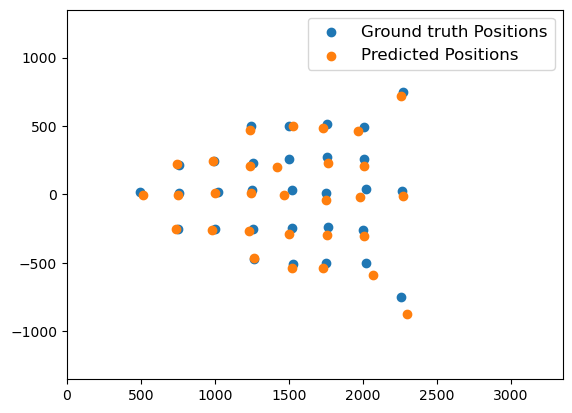

In [132]:
mlp_reg = MLPRegressor()
# parameters = {
#     'hidden_layer_sizes': [
#         (10,10,),
#         (30,30,),
#         (50,50,),
#         (100,100,),
#         (10,10,10,),
#         (30,30,30,),
#         (50,50,50,),
#         (100,100,100,),
#         (10,10,10,10,10,),
#         (30,30,30,30,30,),
#         (50,50,50,50,50,),
#         (100,100,100,100,100,)
#     ],
#     'learning_rate_init': [0.01, 0.001, 0.0001],
#     'random_state': [3],
#     'tol': [1e-7, 1e-8],
#     'max_iter': [50000]
# }
parameters = {
    'hidden_layer_sizes': [
        (100, 100, 100, 100, 100)
    ],
    'learning_rate_init': [0.01, 0.001],
    'random_state': [3],
    'tol': [1e-7],
    'max_iter': [50000]
}
train_and_test_preprocessed_all(mlp_reg, "MLP", parameters)

# mlp_reg = MLPRegressor(random_state=1, max_iter=10000, hidden_layer_sizes = (100,100,100,), learning_rate_init=0.01)
# train_and_test_preprocessed_all(mlp_reg, "MLP")

In [133]:
# ridge_reg = Ridge(alpha=1.0)
# train_and_test(ridge_reg, "Ridge")

# ridge_reg = Ridge(alpha=1.0)
# train_and_test_preprocessed(ridge_reg, "Ridge")

In [134]:
# lasso_reg = linear_model.Lasso(alpha=0.1, max_iter=10000)
# train_and_test(lasso_reg, "Lasso")

# lasso_reg = linear_model.Lasso(alpha=0.1, max_iter=10000)
# train_and_test_preprocessed(lasso_reg, "Lasso")

In [135]:
# elastic_net = ElasticNet(random_state=0)
# train_and_test(elastic_net, "ElasticNet")

# elastic_net = ElasticNet(random_state=0)
# train_and_test_preprocessed(elastic_net, "ElasticNet")